In [6]:
 # we want the matplotlib plots to be within the notebook
import matplotlib.pyplot as plt



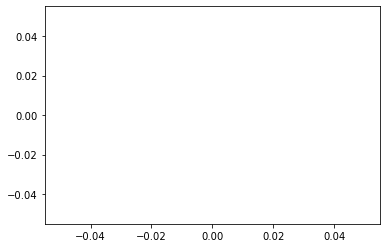

In [7]:
plt.plot();

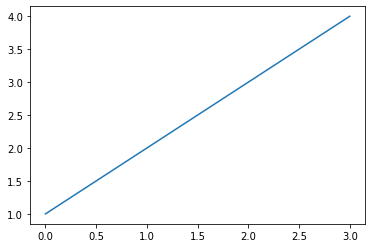

In [8]:
plt.plot([1,2,3,4]);

In [10]:
#Create some data

x = [1,2,3,4]
y = [11,22,33,44]

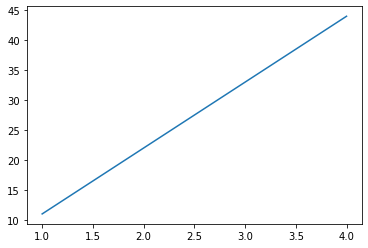

In [11]:
plt.plot(x,y);

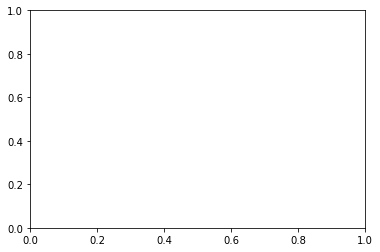

In [12]:
#Create a plot with the OO version, confusing way first

fig = plt.figure()
ax = fig.add_subplot()
plt.show()

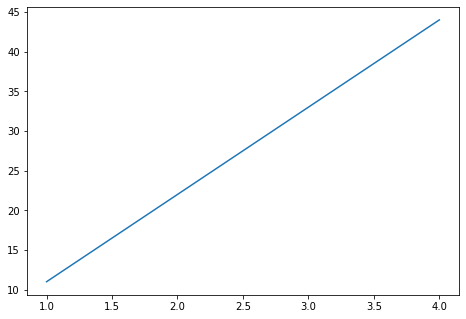

In [13]:
#2nd method
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y)
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

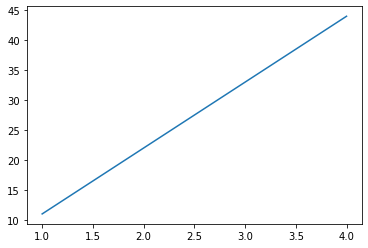

In [15]:
#3rd method
fig,ax = plt.subplots()
ax.plot(x,y); #add some data
type(fig),type(ax) #axis object is a subplot

### We are going to stick to the object oriented programming.

### Part 2 Anatomy of a figure

In [16]:
#Matplotlib example workflow

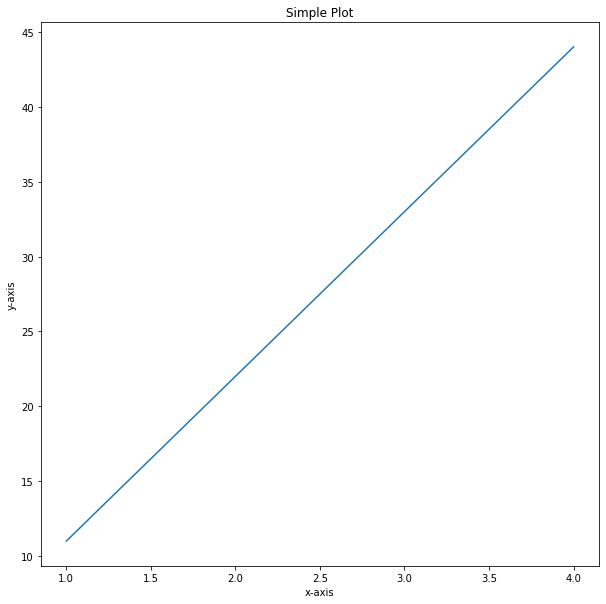

In [20]:
#0. import matplotlib and get it ready for plotting in Jupyter

%matplotlib inline
import matplotlib.pyplot as plt

#1. Preapare data
x = [1,2,3,4]
y = [11,22,33,44]


#2. Setup plot

fig,ax = plt.subplots(figsize = (10,10)) #width,height

#3. Plot data
ax.plot(x,y)

ax.set(title = "Simple Plot",
      xlabel = "x-axis",
      ylabel = "y-axis")
#5. Save and show (you have the whole figure)
fig.savefig("../sample-plot.png")

### Scatter Plot and Bar-chart

In [21]:
import numpy as np


In [25]:
#Create some data
x = np.linspace(0,10,100) #generates evenly spaced data over an interval 0-10


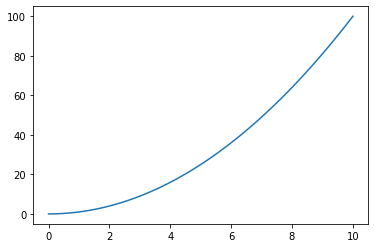

In [28]:
#Plot the data and create a line plot.
fig,ax = plt.subplots()
ax.plot(x,x**2);

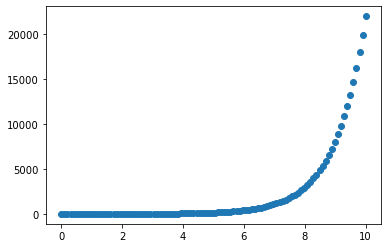

In [31]:
#Use the same data to create a line plot.
fig,ax = plt.subplots()
ax.scatter(x,np.exp(x));

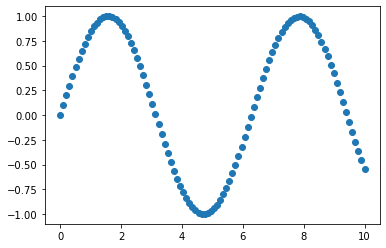

In [33]:
#Another scatter plot
fig,ax = plt.subplots()
ax.scatter(x,np.sin(x));

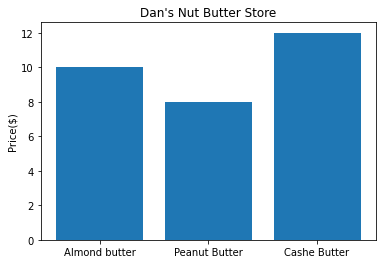

In [44]:
#Make a plot from dictionary
nut_butter_prices = {"Almond butter":10,
                    "Peanut Butter": 8,
                    "Cashe Butter" : 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax.set(title = "Dan's Nut Butter Store",
       ylabel = "Price($)");
plt.show()

### Horizontal bar graphs

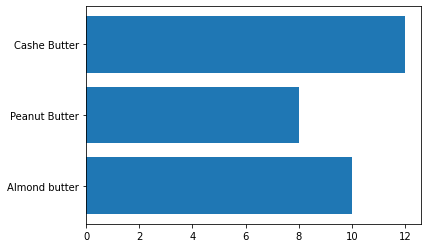

In [46]:
fig,ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()),list(nut_butter_prices.values()));

In [53]:
#Make a histogram
x = np.random.randn(1000)

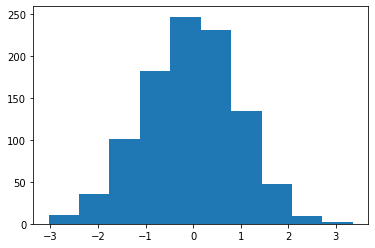

In [54]:
fig,ax = plt.subplots()
ax.hist(x);

In [55]:
#Two options for subplots

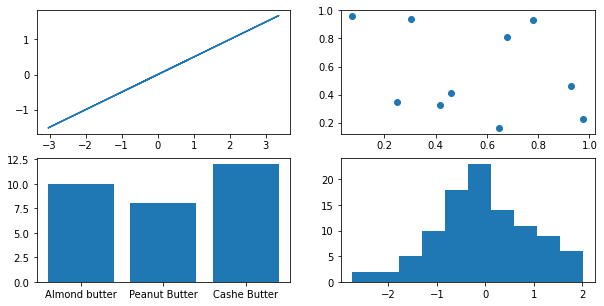

In [66]:
#Subplot option1

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,
                                         ncols=2,
                                         figsize = (10,5))
#We are basically saying there are 4 data with 2 rows 2 coloums

ax1.plot(x,x/2);
ax2.scatter(np.random.random(10),np.random.random(10));
ax3.bar(nut_butter_prices.keys(),nut_butter_prices.values());
ax4.hist(np.random.randn(100));

### OPTION 2 FOR CREATING MULTIPLE PLOTS

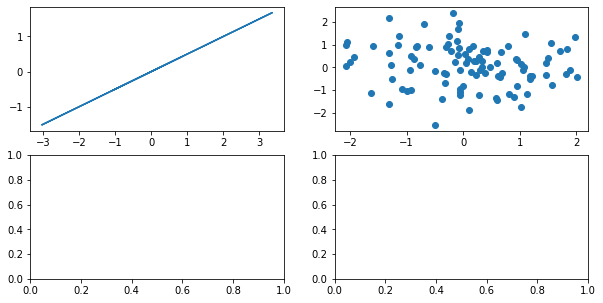

In [70]:
#Subplot option 2

fig,ax = plt.subplots(nrows=2,
                      ncols = 2,
                      figsize = (10,5))

#Plot to each different index
ax[0,0] .plot(x,x/2);
ax[0,1].scatter(np.random.randn(100),np.random.randn(100));


### Plotting from Pandas DataFrames


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
car_sales = pd.read_csv("car-sales.xls")

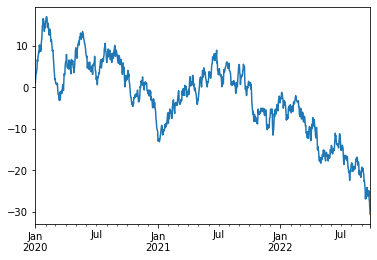

In [14]:
ts = pd.Series(np.random.randn(1000),
              index = pd.date_range("1/1/2020",periods = 1000))
ts = ts.cumsum()
ts.plot();

In [18]:
car_sales


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [19]:
car_sales["Price"] = car_sales["Price"].str.replace("[\$\,\.]","")
#Replace the symbols "$" and "." with nothing i.e. just gets rid of these symbols
car_sales

C:\Users\aavas\AppData\Local\Temp/ipykernel_93432/2333275371.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace("[\$\,\.]","")


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [20]:
#To get rid of extra two zeroes as we have basically got rid of the decimal point
car_sales["Price"] = car_sales["Price"].str[:-2]

In [21]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [100]:
car_sales["Sales Date"] = pd.date_range("1/1/2020", periods = len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sales Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


In [99]:
car_sales["Total Sales"] = (car_sales["Price"]).astype(int).cumsum() #changes the type of the value to int

In [23]:
car_sales


,Make,Colour,Odometer (KM),Doors,Price,Sales Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


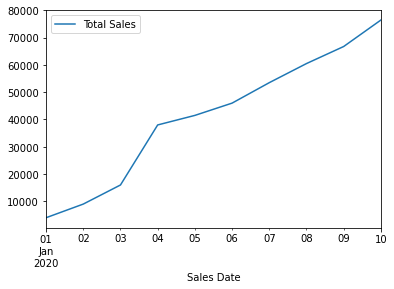

In [26]:
car_sales.plot(x = "Sales Date", y = "Total Sales");

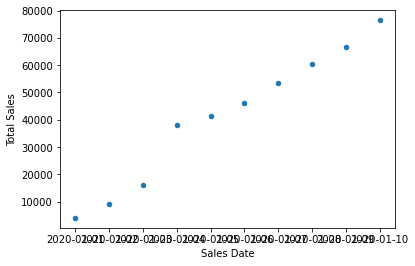

In [47]:
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales.plot(x= "Sales Date", y = "Total Sales", kind = "scatter");

### Bar Graph

In [9]:
x = np.random.randn(10,4)
x

df = pd.DataFrame(x,columns = ["a","b","c","d"])


In [6]:
df

,a,b,c,d
0,0.942966,-0.295807,0.617716,1.152138
1,0.900002,-0.409947,-0.356211,0.261590
2,0.941497,1.729201,-0.751065,-0.566476
3,0.546880,-1.431346,-0.679583,1.617629
4,0.966807,-2.005313,-0.194058,-1.521883
5,-0.111144,1.918149,-0.005373,-0.504740
6,0.214346,-2.979996,0.810750,-0.129830
7,0.360401,1.326045,0.487680,0.825285
8,-1.411302,0.251446,1.975581,-0.809439
9,0.525150,-0.086243,-1.044523,-0.391478


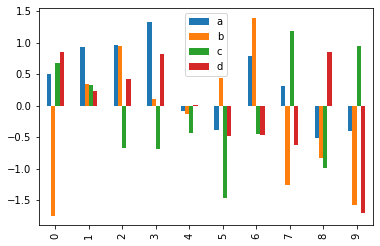

In [10]:
df.plot.bar();

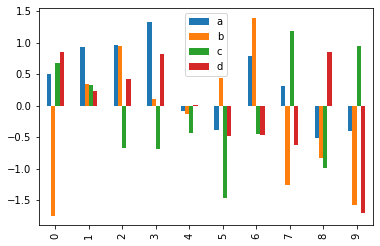

In [13]:
df.plot(kind = "bar");

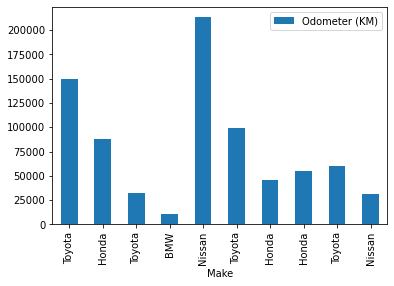

In [27]:
car_sales.plot(x = "Make", y = "Odometer (KM)", kind="bar");

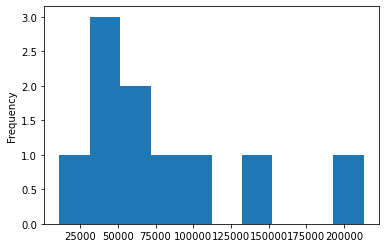

In [29]:
#How about histograms?
#For visualising distributions:

car_sales["Odometer (KM)"].plot.hist();

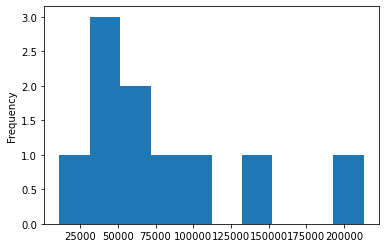

In [32]:
car_sales["Odometer (KM)"].plot(kind="hist");

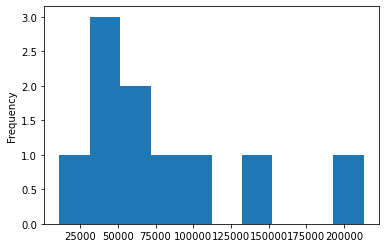

In [41]:
car_sales["Odometer (KM)"].plot.hist(bins=10);

In [43]:
#Lets try another data set.

heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


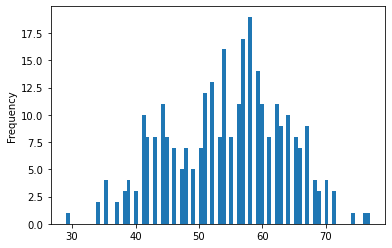

In [48]:
heart_disease["age"].plot.hist(bins = 80);

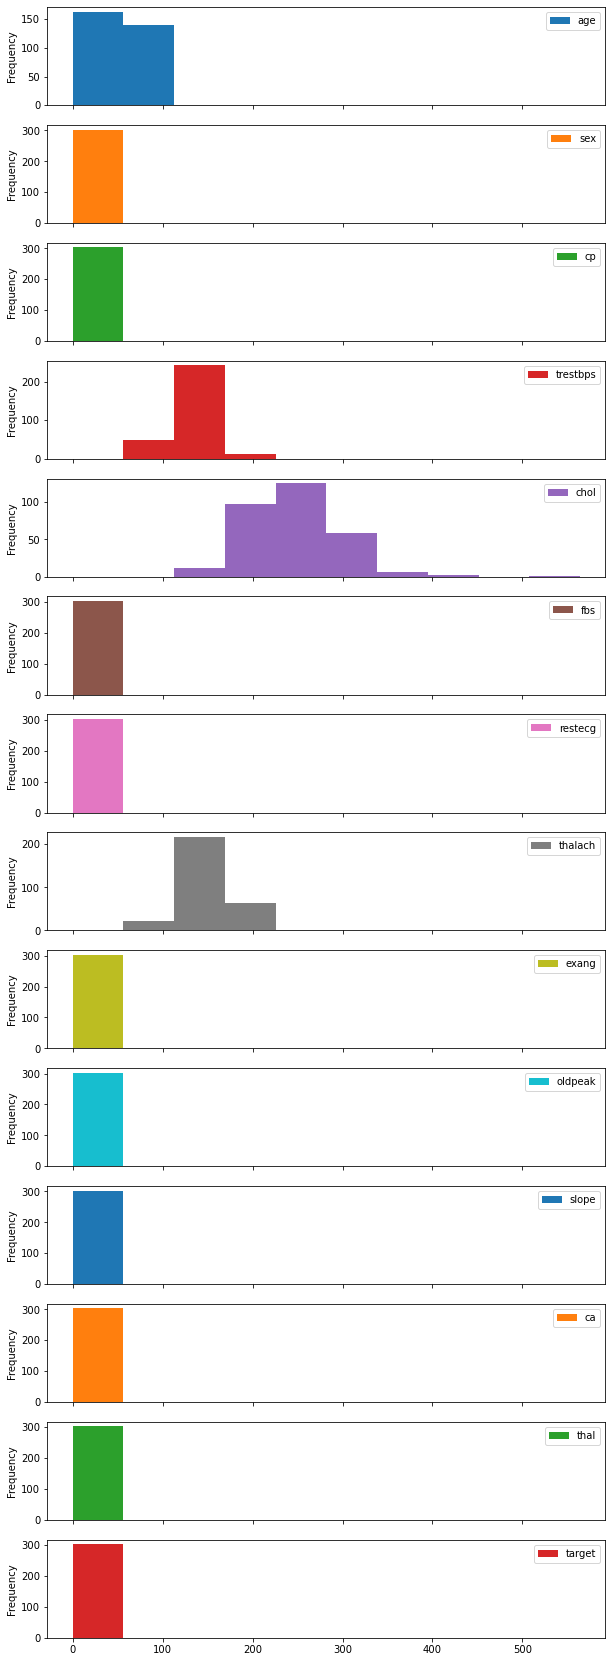

In [51]:
heart_disease.plot.hist(figsize= (10,30),subplots = True);

In [52]:
#Using the object orientated method

#Which one should you use pyplot vs matploblib OO method
* When plotting something quickly okay to use pyplot method
* When plotting something more advanced use the OO method

In [55]:
over_50 = heart_disease[heart_disease["age"] > 50]

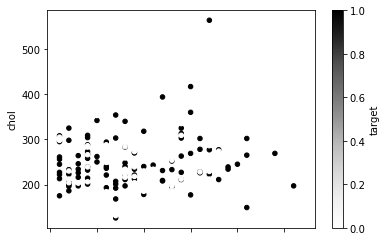

In [70]:
#Pyplot Method
over_50.plot(kind="scatter",
            x="age",
            y="chol",
            c="target");

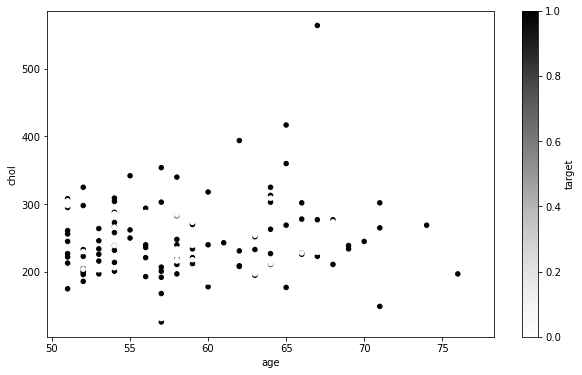

In [69]:
fig,ax = plt.subplots(figsize = (10,6))
over_50.plot(kind="scatter",
            x="age",
            y="chol",
            c="target",
            ax=ax); #Plot this data in the axis of a 
#ax.set_xlim([45,100]) #Changes the limitations of the x-axis

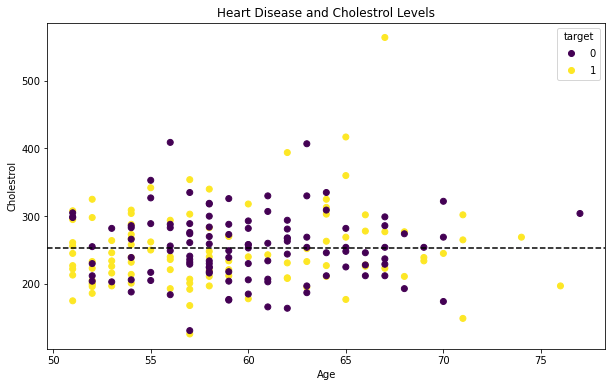

In [80]:
##OO method from scratch
fig,ax = plt.subplots(figsize=(10,6))

#Plot the data
scatter = ax.scatter(x=over_50["age"],
                    y=over_50["chol"],
                    c=over_50["target"]);

ax.set(title="Heart Disease and Cholestrol Levels",
      xlabel="Age",
      ylabel="Cholestrol");

#Add a legend
ax.legend(*scatter.legend_elements(),title="target");

#Add a horizontal line
ax.axhline(over_50["chol"].mean(),
           linestyle="--",
          c="black");

In [81]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


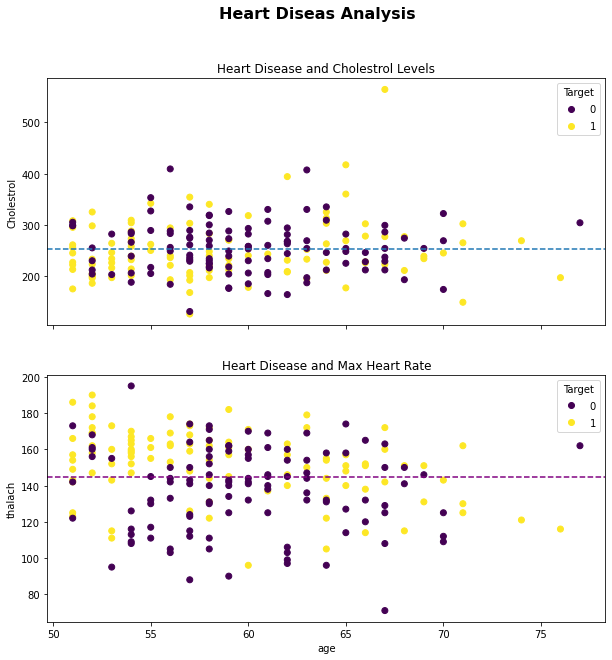

In [94]:
#Subplots of chol,age,thalach
#Single figure with two axes
fig,(ax0,ax1) = plt.subplots(nrows=2,
                            ncols=1,
                            figsize=(10,10),
                            sharex=True)
#Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"])

#Customize ax0
ax0.set(title="Heart Disease and Cholestrol Levels",
       ylabel="Cholestrol")

#Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

#Add a dashed line to ax0
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--");

#ax2

scatter = ax1.scatter(x=over_50["age"],
                       y=over_50["thalach"],
                       c=over_50["target"])

#Customize ax0
ax1.set(title="Heart Disease and Max Heart Rate",
       xlabel="age",
       ylabel="thalach")
ax1.legend(*scatter.legend_elements(),title="Target")
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle="--",
           c="purple");

#Add a title to the figure
fig.suptitle("Heart Diseas Analysis",fontsize=16, fontweight="bold");

### Customizing Matpotlib styles

In [96]:
#Customisation to the plot
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [103]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sales Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


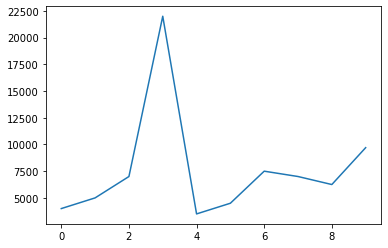

In [104]:
car_sales["Price"].astype(int).plot();

In [106]:
plt.style.use("seaborn-whitegrid")


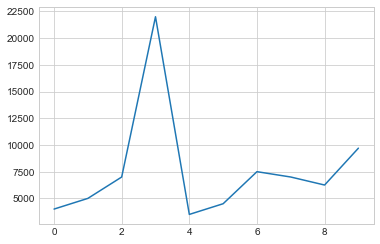

In [107]:
car_sales["Price"].astype(int).plot();

<AxesSubplot:xlabel='Odometer (KM)', ylabel='Price'>

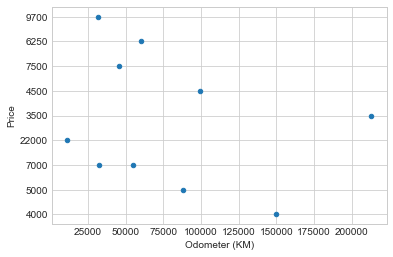

In [113]:
car_sales.plot(x="Odometer (KM)",y="Price", kind="scatter")

In [115]:
plt.style.use("ggplot")

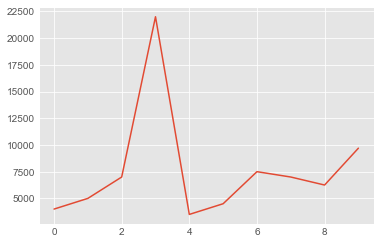

In [117]:
car_sales["Price"].astype(int).plot();

In [127]:
#Create some data
x = np.random.randn(10,4)

In [128]:
df= pd.DataFrame(x, columns = ["a","b","c","d"])
df

,a,b,c,d
0,0.435802,-1.452705,0.654496,0.737725
1,0.186128,0.045094,-1.054383,1.222406
2,0.110418,-0.490146,-1.060604,-0.154372
3,0.638319,-0.349132,0.489790,-0.920586
4,0.937435,0.150957,0.494032,-0.097549
5,-0.278766,0.399542,-0.185815,0.330866
6,0.298997,0.710421,0.621724,-1.642506
7,2.049369,1.420961,1.843842,1.209028
8,-0.115835,2.314429,0.944468,-0.567733
9,-0.031186,-0.325551,-0.617524,0.604137


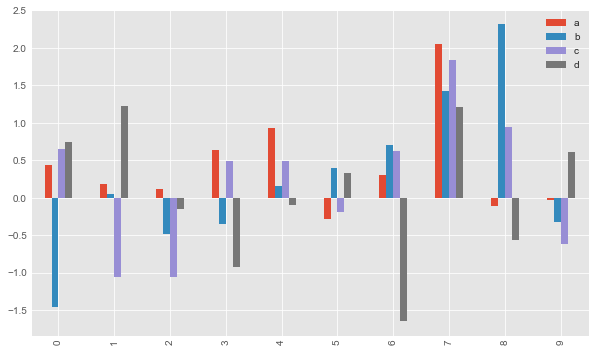

In [129]:
ax = df.plot(kind="bar",figsize=(10,6))

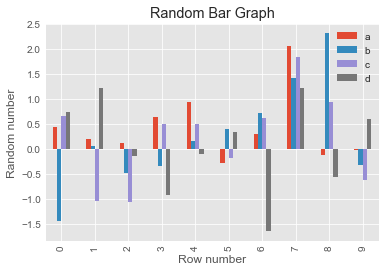

In [130]:
#Customize our plot wiht set() method
ax=df.plot(kind="bar")

ax.set(title="Random Bar Graph",
       xlabel="Row number",
       ylabel="Random number")

#Make the legend visible
ax.legend().set_visible(True);

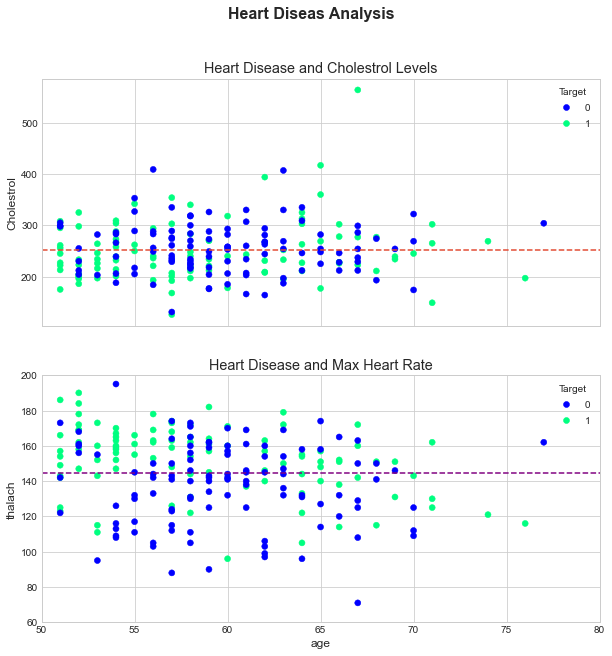

In [139]:
plt.style.use("seaborn-whitegrid")
#Single figure with two axes
fig,(ax0,ax1) = plt.subplots(nrows=2,
                            ncols=1,
                            figsize=(10,10),
                            sharex=True)
#Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                     cmap="winter")

#Customize ax0
ax0.set(title="Heart Disease and Cholestrol Levels",
       ylabel="Cholestrol")

#Change the x axis limit
ax0.set_xlim([50,80])


#Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

#Add a dashed line to ax0
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--");

#ax2

scatter = ax1.scatter(x=over_50["age"],
                       y=over_50["thalach"],
                       c=over_50["target"],
                    cmap="winter")

ax1.set_xlim([50,80])
ax1.set_ylim([60,200])
#Customize ax0
ax1.set(title="Heart Disease and Max Heart Rate",
       xlabel="age",
       ylabel="thalach")
ax1.legend(*scatter.legend_elements(),title="Target")
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle="--",
           c="purple");

#Add a title to the figure
fig.suptitle("Heart Diseas Analysis",fontsize=16, fontweight="bold");

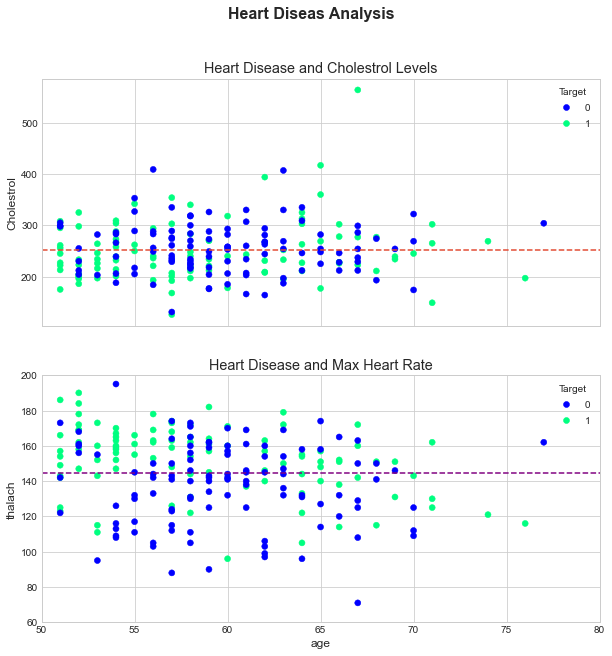

In [140]:
#Save the figure
fig

In [141]:
fig.savefig("heart-disease-analysis-plot-savewithcode.png")